# See how variables relate to each other in the PGA dataset

## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
golf = pd.read_csv('../data/pgaTourData.csv')

In [3]:
golf.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


*Now you can specifically isolate two variables to check for the relationship between them.  Say you wanted to determine how the fairway percentage and the average distance relate to each other. The function .corr() has got your back! Simply put in the dataframe and name of one variable, then use .corr and specify the dataframe and name of the other variable*

In [4]:
golf['Fairway Percentage'].corr(golf['Avg Distance'])

-0.5338318311148584

*Python outputs just the r value for you.  So, this is a moderately strong negative correlation, which means that as fairway percentage goes up, the average distance goes down, and vice versa.*

*You could also create a correlation matrix. This allows you to look at the correlations of many variable at once.  However, the trick is that you cannot do a correlation matrix on your dataframe unless you have only continuous variables.  So, you need to drop anything that is categorical or a string. IN this case, that's just Player Name.*

*When running your drop command, you will use pandas .drop function.  Inside the brackets and in quotes, you will put the name of anything that you want to drop. Then you want to specify axis=1 because that is how you tell pandas to drop the columsn and not the rows.*

In [5]:
golf1 = golf.drop(['Player Name'], axis=1)

*And then of course run .head() to make sure it did what you wanted it to.*

In [6]:
golf1.head()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


*Now you can go ahead and call .corr() on the entire dataset, since you eliminated your string data. The method=argument allows you to specify what type of correlation you want to use.  In this case, the most common correlation is pearson, and you'll stick with that.*

In [7]:
golf1.corr(method='pearson')

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
Rounds,1.000000,0.083597,0.078522,0.069599,0.252190,-0.125943,0.227928,-0.313380,-0.097741,0.211198,0.173218,0.317011,0.164208,0.192764,0.112364
Fairway Percentage,0.083597,1.000000,-0.111042,-0.533832,0.343115,0.162757,0.236281,-0.170017,-0.098652,0.024990,-0.043493,0.162458,0.179032,0.155015,0.000356
Year,0.078522,-0.111042,1.000000,0.221102,-0.000044,-0.145524,0.107181,-0.006801,0.060289,0.076493,0.023785,0.029939,0.003330,0.009928,0.035493
Avg Distance,0.069599,-0.533832,0.221102,1.000000,0.292965,0.167314,-0.228979,-0.273230,0.247126,0.226512,-0.136676,0.278923,0.604456,0.142217,-0.191637
gir,0.252190,0.343115,-0.000044,0.292965,1.000000,0.549402,0.038068,-0.485030,0.267357,0.276390,-0.231629,0.487778,0.582466,0.577074,-0.103955
Average Putts,-0.125943,0.162757,-0.145524,0.167314,0.549402,1.000000,-0.549805,0.263041,-0.209932,-0.245181,-0.720328,-0.265734,0.293925,0.133635,-0.449081
Average Scrambling,0.227928,0.236281,0.107181,-0.228979,0.038068,-0.549805,1.000000,-0.518057,0.248329,0.311253,0.458220,0.517527,-0.024871,0.196124,0.613776
Average Score,-0.313380,-0.170017,-0.006801,-0.273230,-0.485030,0.263041,-0.518057,1.000000,-0.477661,-0.700529,-0.364817,-0.962318,-0.530624,-0.669370,-0.390284
Wins,-0.097741,-0.098652,0.060289,0.247126,0.267357,-0.209932,0.248329,-0.477661,1.000000,0.450695,0.216024,0.470284,0.244059,0.348876,0.217539
Top 10,0.211198,0.024990,0.076493,0.226512,0.276390,-0.245181,0.311253,-0.700529,0.450695,1.000000,0.270748,0.695163,0.352702,0.457636,0.254826


*The output of the code above is this correlation matrix. It shows the correlation of each variable with every other variable. Remember that each variable correlates with itself perfectly, so you get a line of 1s all the way down the correlation matrix, like this.  You can choose to read to the right of this line, or to the left of this line, but you only really need to pay attention to half this table, since it is exactly the same on either side.  Unsure? Check this out. Looking at the rounds column and going down to the fairway percentage row, you see the correlation is .08.  Going to the fairway percentage colum nad going down to the rounds row shows a correlation of .08 as well. Exactly the same, and they show as mirror opposites on the chart.*

*Now as whole slew of numbers are good, but wouldn't some visual color coding be even better? You can add a little bit of code to gussy up this table.*

In [8]:
golf1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
Rounds,1.0,0.084,0.079,0.07,0.25,-0.13,0.23,-0.31,-0.098,0.21,0.17,0.32,0.16,0.19,0.11
Fairway Percentage,0.084,1.0,-0.11,-0.53,0.34,0.16,0.24,-0.17,-0.099,0.025,-0.043,0.16,0.18,0.16,0.00036
Year,0.079,-0.11,1.0,0.22,-4.4e-05,-0.15,0.11,-0.0068,0.06,0.076,0.024,0.03,0.0033,0.0099,0.035
Avg Distance,0.07,-0.53,0.22,1.0,0.29,0.17,-0.23,-0.27,0.25,0.23,-0.14,0.28,0.6,0.14,-0.19
gir,0.25,0.34,-4.4e-05,0.29,1.0,0.55,0.038,-0.49,0.27,0.28,-0.23,0.49,0.58,0.58,-0.1
Average Putts,-0.13,0.16,-0.15,0.17,0.55,1.0,-0.55,0.26,-0.21,-0.25,-0.72,-0.27,0.29,0.13,-0.45
Average Scrambling,0.23,0.24,0.11,-0.23,0.038,-0.55,1.0,-0.52,0.25,0.31,0.46,0.52,-0.025,0.2,0.61
Average Score,-0.31,-0.17,-0.0068,-0.27,-0.49,0.26,-0.52,1.0,-0.48,-0.7,-0.36,-0.96,-0.53,-0.67,-0.39
Wins,-0.098,-0.099,0.06,0.25,0.27,-0.21,0.25,-0.48,1.0,0.45,0.22,0.47,0.24,0.35,0.22
Top 10,0.21,0.025,0.076,0.23,0.28,-0.25,0.31,-0.7,0.45,1.0,0.27,0.7,0.35,0.46,0.25


*And tada! Now you can very easily see that row of 1s, since they are all highlighted in red as a perfect correlation.  The warmer colors (shades of red/pinkk) are positive correlations, and the darker the color, the stronger the correlation.  The cooler colors (shades of blue) are negative correlations, and again, the stronger the correlation, the deeper or more vibrant the color. What sticks out to you here? Looks like average score correlates with a number of different things pretty strongly, and fairway percentaged correlates with average distance pretty well too*

*You can also do correlations easily on your data without so much fuss by using the seaborn heatmap function. It will give you the correlations if you choose the annot=True option.*

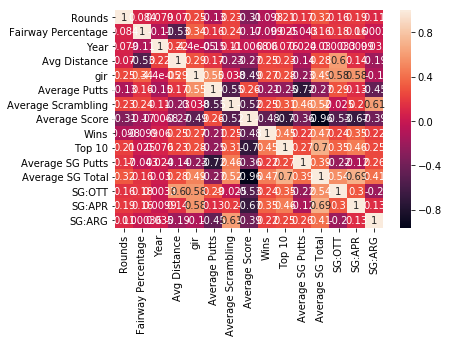

In [9]:
sns.heatmap(golf1.corr(), annot=True)

*As you can see, that option is nice and easy, but can be difficult to read especially if you have a lot of variables. So it is always good to have options, and you will want to choose the one that makes the most sense for your task.*